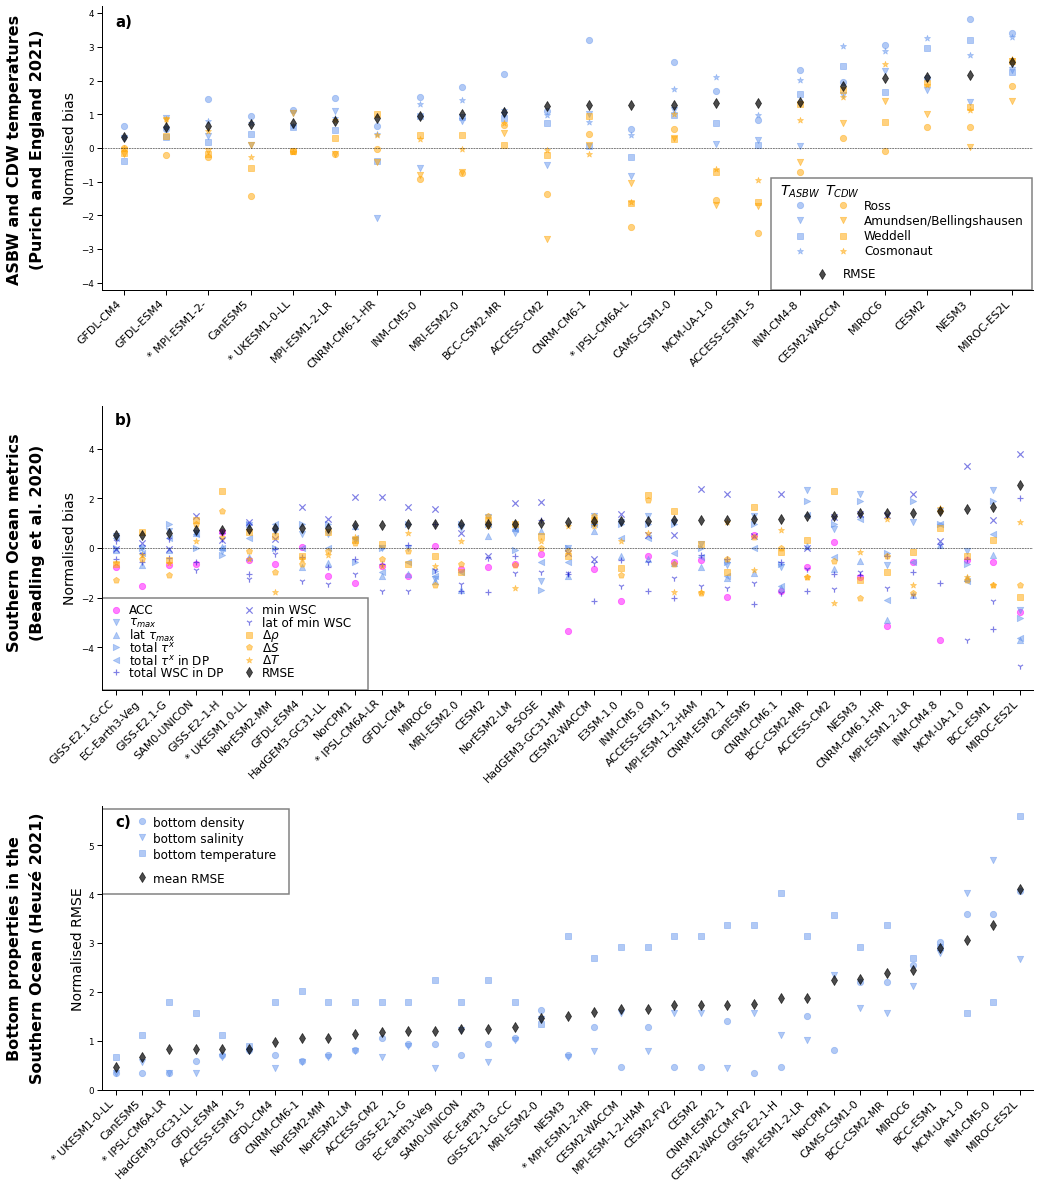

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

sns.set_context('paper')
#sns.despine()

all_models = ['OBSERVATIONS', 'ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'EC-Earth3', 'EC-Earth3-Veg', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MCM-UA-1-0', 'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-1-2-LR', 'MRI-ESM2-0', 'NorCPM1', 'NESM3', 'SAM0-UNICON', 'UKESM1-0-LL' ]
selected_models1 = ['MPI-ESM1-2-HR', 'UKESM1-0-LL', 'IPSL-CM6A-LR']
selected_models2 = ['UKESM1-0-LL', 'IPSL-CM6A-LR']
selected_models3 = ['UKESM1-0-LL', 'IPSL-CM6A-LR', 'MPI-ESM1-2-HR']
xb1 = np.arange(5,11,5)

fig, axs = plt.subplots(nrows=3,ncols=1,figsize=(16.0,18.0))
#fig.tight_layout(pad=10.0)
fig.tight_layout(rect=[0,0,1,1], pad=10.0)
axs = axs.ravel()

#------------------------------
# Purich and England (2021)

npz_Ros = np.load('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/EVAL_OCEAN_CMIP6/TASBW_TCDW_Purish_Ross.npz')
npz_AmB = np.load('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/EVAL_OCEAN_CMIP6/TASBW_TCDW_Purish_AmBell.npz')
npz_Wed = np.load('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/EVAL_OCEAN_CMIP6/TASBW_TCDW_Purish_Weddell.npz')
npz_Cos = np.load('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/EVAL_OCEAN_CMIP6/TASBW_TCDW_Purish_Cosmonaut.npz')

#models_purich = npz_Ros['models']
models_purich = np.array(['OBSERVATIONS', 'ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR',
       'CAMS-CSM1-0', 'CanESM5', 'CESM2', 'CESM2-WACCM', 'CNRM-CM6-1',
       'CNRM-CM6-1-HR', 'GFDL-CM4', 'GFDL-ESM4', 'INM-CM4-8', 'INM-CM5-0',
       '* IPSL-CM6A-LR', 'MCM-UA-1-0', 'MIROC6', 'MIROC-ES2L',
       '* MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3',
       '* UKESM1-0-LL'], dtype='<U13')
Nmod_purich = np.size(models_purich)

# temperature biases (compared to observations):
bias_TASBW_Ros = npz_Ros['TASBW'] - npz_Ros['TASBW'][0]
bias_TCDW_Ros  = npz_Ros['TCDW']  - npz_Ros['TCDW'][0]
bias_TASBW_AmB = npz_AmB['TASBW'] - npz_AmB['TASBW'][0]
bias_TCDW_AmB  = npz_AmB['TCDW']  - npz_AmB['TCDW'][0]
bias_TASBW_Wed = npz_Wed['TASBW'] - npz_Wed['TASBW'][0]
bias_TCDW_Wed  = npz_Wed['TCDW']  - npz_Wed['TCDW'][0]
bias_TASBW_Cos = npz_Cos['TASBW'] - npz_Cos['TASBW'][0]
bias_TCDW_Cos  = npz_Cos['TCDW']  - npz_Cos['TCDW'][0]

# index = normalised bias:
index_TASBW_Ros = bias_TASBW_Ros / np.std(bias_TASBW_Ros)
index_TCDW_Ros  = bias_TCDW_Ros  / np.std(bias_TCDW_Ros)
index_TASBW_AmB = bias_TASBW_AmB / np.std(bias_TASBW_AmB)
index_TCDW_AmB  = bias_TCDW_AmB  / np.std(bias_TCDW_AmB)
index_TASBW_Wed = bias_TASBW_Wed / np.std(bias_TASBW_Wed)
index_TCDW_Wed  = bias_TCDW_Wed  / np.std(bias_TCDW_Wed)
index_TASBW_Cos = bias_TASBW_Cos / np.std(bias_TASBW_Cos)
index_TCDW_Cos  = bias_TCDW_Cos  / np.std(bias_TCDW_Cos)

# total RMSE:
tmpmean = ( index_TASBW_Ros+index_TCDW_Ros+index_TASBW_AmB+index_TCDW_AmB+index_TASBW_Wed+index_TCDW_Wed+index_TASBW_Cos+index_TCDW_Cos ) / 8
rmsetot = np.sqrt( (   (index_TASBW_Ros-tmpmean[0])**2 + (index_TCDW_Ros-tmpmean[0])**2 \
                     + (index_TASBW_AmB-tmpmean[0])**2 + (index_TCDW_AmB-tmpmean[0])**2 \
                     + (index_TASBW_Wed-tmpmean[0])**2 + (index_TCDW_Wed-tmpmean[0])**2 \
                     + (index_TASBW_Cos-tmpmean[0])**2 + (index_TCDW_Cos-tmpmean[0])**2 ) / 8 )
rmsetot = np.squeeze(rmsetot)

# reorder by growing value of rmsetot :
order=rmsetot.argsort()

xx = np.arange(Nmod_purich-1) # first is OBSERVATIONS
axs[0].plot([-0.5,Nmod_purich-1.5],[0, 0],color='k',linestyle="--",linewidth=0.5)
axs[0].scatter(xx,index_TASBW_Ros[order][1:],s=40,c='cornflowerblue',marker='o',alpha=0.5)
axs[0].scatter(xx,index_TASBW_AmB[order][1:],s=40,c='cornflowerblue',marker='v',alpha=0.5)
axs[0].scatter(xx,index_TASBW_Wed[order][1:],s=40,c='cornflowerblue',marker='s',alpha=0.5)
axs[0].scatter(xx,index_TASBW_Cos[order][1:],s=40,c='cornflowerblue',marker='*',alpha=0.5)
axs[0].scatter(xx,index_TCDW_Ros[order][1:],s=40,c='orange',marker='o',alpha=0.5)
axs[0].scatter(xx,index_TCDW_AmB[order][1:],s=40,c='orange',marker='v',alpha=0.5)
axs[0].scatter(xx,index_TCDW_Wed[order][1:],s=40,c='orange',marker='s',alpha=0.5)
axs[0].scatter(xx,index_TCDW_Cos[order][1:],s=40,c='orange',marker='*',alpha=0.5)
axs[0].scatter(xx,rmsetot[order][1:],s=50,c='k',marker='d',alpha=0.7)

axs[0].set_ylabel('Normalised bias',fontsize=14)
axs[0].set_xticks(xx)
axs[0].set_xticklabels(models_purich[order][1:])
plt.setp( axs[0].xaxis.get_majorticklabels(), rotation=45, size=11, horizontalalignment='right' )
axs[0].text(-0.2,3.6,'a)',fontsize=15,weight='bold')
axs[0].set_xlim(-0.5,Nmod_purich-1.5)
axs[0].set_ylim(-4.2,4.2)

# legend:
dd=0.45
axs[0].scatter(Nmod_purich-7,-1.7-0*dd,s=40,c='cornflowerblue',marker='o',alpha=0.5)
axs[0].scatter(Nmod_purich-7,-1.7-1*dd,s=40,c='cornflowerblue',marker='v',alpha=0.5)
axs[0].scatter(Nmod_purich-7,-1.7-2*dd,s=40,c='cornflowerblue',marker='s',alpha=0.5)
axs[0].scatter(Nmod_purich-7,-1.7-3*dd,s=40,c='cornflowerblue',marker='*',alpha=0.5)
axs[0].scatter(Nmod_purich-6,-1.7-0*dd,s=40,c='orange',marker='o',alpha=0.5)
axs[0].scatter(Nmod_purich-6,-1.7-1*dd,s=40,c='orange',marker='v',alpha=0.5)
axs[0].scatter(Nmod_purich-6,-1.7-2*dd,s=40,c='orange',marker='s',alpha=0.5)
axs[0].scatter(Nmod_purich-6,-1.7-3*dd,s=40,c='orange',marker='*',alpha=0.5)
axs[0].scatter(Nmod_purich-6.5,-1.7-4.5*dd,s=50,c='k',marker='d',alpha=0.7)
axs[0].text(Nmod_purich-7,-1.4,'$T_{ASBW}$',horizontalalignment='center',fontsize=14,weight='bold')
axs[0].text(Nmod_purich-6,-1.4,'$T_{CDW}$',horizontalalignment='center',fontsize=14,weight='bold')
axs[0].text(Nmod_purich-5.5,-1.7-0*dd,'Ross',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[0].text(Nmod_purich-5.5,-1.7-1*dd,'Amundsen/Bellingshausen',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[0].text(Nmod_purich-5.5,-1.7-2*dd,'Weddell',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[0].text(Nmod_purich-5.5,-1.7-3*dd,'Cosmonaut',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[0].text(Nmod_purich-6,-1.7-4.5*dd,'RMSE',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[0].add_patch(Rectangle((15.3, -4.2), 6.18, 3.3, edgecolor = 'grey', fill=False, lw=1.5))

# add selected models
#axs[0].scatter(2,-4,s=50,c='red',marker='^')
#axs[0].scatter(4,-4,s=50,c='red',marker='^')
#axs[0].scatter(12,-4,s=50,c='red',marker='^')

#----------------------------------------
# Analyse data from Beadling et al. (2021)

f = open('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/EVAL_OCEAN_CMIP6/Beadling.txt', 'r')
header1 = f.readline()
header2 = f.readline()

Nvar=11
Nmod_beadling=36
var=np.zeros((Nvar,Nmod_beadling))

models_beadling=[]
kmod=0
for line in f:
    line = line.strip()
    columns = line.split()
    models_beadling = np.append(models_beadling,columns[0])
    for kvar in np.arange(Nvar):
       var[kvar,kmod] = float(columns[kvar+1])
    kmod=kmod+1

f.close()

models_beadling = np.array(['OBSERVATIONS', 'B-SOSE', 'GISS-E2–1-H', 'CanESM5', 'ACCESS-CM2',
       'MIROC6', 'GFDL-ESM4', 'INM-CM5.0', '* UKESM1.0-LL', 'MCM-UA-1.0',
       'MPI-ESM-1.2-HAM', 'ACCESS-ESM1.5', 'BCC-ESM1', 'MPI-ESM1.2-LR',
       'SAM0-UNICON', 'NorESM2-MM', 'NorESM2-LM', 'GISS-E2.1-G',
       '* IPSL-CM6A-LR', 'BCC-CSM2-MR', 'CESM2', 'GISS-E2.1-G-CC',
       'CESM2-WACCM', 'MRI-ESM2.0', 'GFDL-CM4', 'HadGEM3-GC31-LL',
       'NESM3', 'NorCPM1', 'EC-Earth3-Veg', 'CNRM-CM6.1', 'CNRM-ESM2.1',
       'E3SM-1.0', 'MIROC-ES2L', 'CNRM-CM6.1-HR', 'HadGEM3-GC31-MM',
       'INM-CM4.8'], dtype='<U32')

# calculate evaluation metrics :
bias_var = np.zeros((Nvar,Nmod_beadling))
index_var = np.zeros((Nvar,Nmod_beadling))
for kvar in np.arange(Nvar):
  bias_var[kvar,:] = var[kvar,:] - var[kvar,0] # bias with respect to observational estimates
  index_var[kvar,:] = bias_var[kvar,:] / np.nanstd(bias_var[kvar,:])

# total RMSE for each model:
tmpmeanB = np.nanmean(index_var,axis=0)
rmsetotB=np.zeros(np.shape(tmpmeanB))
for kmod in np.arange(Nmod_beadling):
  rmsetotB[kmod] = np.sqrt( np.nanmean( (index_var[:,kmod]-tmpmeanB[kmod])**2 ) )

# reorder by growing value of rmsetot :
orderB=rmsetotB.argsort()

xb = np.arange(Nmod_beadling-1) # first is OBSERVATIONS
axs[1].plot([-0.5,Nmod_beadling-0.5],[0, 0],color='k', linestyle="--",linewidth=0.5)
axs[1].scatter(xb,index_var[0,orderB][1:],s=40,c='magenta',marker='o',alpha=0.5) # ACC
axs[1].scatter(xb,index_var[1,orderB][1:],s=40,c='cornflowerblue',marker='v',alpha=0.5) # taux_max
axs[1].scatter(xb,index_var[2,orderB][1:],s=40,c='cornflowerblue',marker='^',alpha=0.5) # lat_taux_max
axs[1].scatter(xb,index_var[3,orderB][1:],s=40,c='cornflowerblue',marker='>',alpha=0.5) # total_taux
axs[1].scatter(xb,index_var[4,orderB][1:],s=40,c='cornflowerblue',marker='<',alpha=0.5) # total_taux_DP
axs[1].scatter(xb,index_var[5,orderB][1:],s=40,c='mediumblue',marker='+',alpha=0.5) # total_WSC_DP
axs[1].scatter(xb,index_var[6,orderB][1:],s=40,c='mediumblue',marker='x',alpha=0.5) # min_zon_WSC
axs[1].scatter(xb,index_var[7,orderB][1:],s=40,c='mediumblue',marker='1',alpha=0.5) # lat_min_WSC
axs[1].scatter(xb,index_var[8,orderB][1:],s=40,c='orange',marker='s',alpha=0.5) # delta_rho
axs[1].scatter(xb,index_var[9,orderB][1:],s=40,c='orange',marker='p',alpha=0.5) # delta_S
axs[1].scatter(xb,index_var[10,orderB][1:],s=40,c='orange',marker='*',alpha=0.5) # delta_T
axs[1].scatter(xb,rmsetotB[orderB][1:],s=50,c='k',marker='d',alpha=0.7)

axs[1].set_ylabel('Normalised bias',fontsize=14)
axs[1].set_xticks(xb)
axs[1].set_xticklabels(models_beadling[orderB][1:])
axs[1].set_xticklabels(models_beadling[orderB][1:])
plt.setp( axs[1].xaxis.get_majorticklabels(), rotation=45, size=11, horizontalalignment='right' )
axs[1].text(-0.02,5,'b)',fontsize=15,weight='bold')
axs[1].set_xlim(-0.5,Nmod_beadling-1.5)
axs[1].set_ylim(-5.7,5.7)

# legend:
dd=0.50
axs[1].scatter(0,-2.5-0*dd,s=40,c='magenta',marker='o',alpha=0.5) # ACC
axs[1].scatter(0,-2.5-1*dd,s=40,c='cornflowerblue',marker='v',alpha=0.5) # taux_max
axs[1].scatter(0,-2.5-2*dd,s=40,c='cornflowerblue',marker='^',alpha=0.5) # lat_taux_max
axs[1].scatter(0,-2.5-3*dd,s=40,c='cornflowerblue',marker='>',alpha=0.5) # total_taux
axs[1].scatter(0,-2.5-4*dd,s=40,c='cornflowerblue',marker='<',alpha=0.5) # total_taux_DP
axs[1].scatter(0,-2.5-5*dd,s=40,c='mediumblue',marker='+',alpha=0.5) # total_WSC_DP
axs[1].scatter(5,-2.5-0*dd,s=40,c='mediumblue',marker='x',alpha=0.5) # min_zon_WSC
axs[1].scatter(5,-2.5-1*dd,s=40,c='mediumblue',marker='1',alpha=0.5) # lat_min_WSC
axs[1].scatter(5,-2.5-2*dd,s=40,c='orange',marker='s',alpha=0.5) # delta_rho
axs[1].scatter(5,-2.5-3*dd,s=40,c='orange',marker='p',alpha=0.5) # delta_S
axs[1].scatter(5,-2.5-4*dd,s=40,c='orange',marker='*',alpha=0.5) # delta_T
axs[1].scatter(5,-2.5-5*dd,s=50,c='k',marker='d',alpha=0.7)
axs[1].text(0.5,-2.5-0*dd,'ACC',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(0.5,-2.5-1*dd,r'$\tau_{max}$',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(0.5,-2.5-2*dd,r'lat $\tau_{max}$',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(0.5,-2.5-3*dd,r'total $\tau^x$',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(0.5,-2.5-4*dd,r'total $\tau^x$ in DP',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(0.5,-2.5-5*dd,'total WSC in DP',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(5.5,-2.5-0*dd,'min WSC',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(5.5,-2.5-1*dd,'lat of min WSC',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(5.5,-2.5-2*dd,r'$\Delta \rho$',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(5.5,-2.5-3*dd,r'$\Delta S$',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(5.5,-2.5-4*dd,r'$\Delta T$',horizontalalignment='left',verticalalignment='center',fontsize=12)
axs[1].text(5.5,-2.5-5*dd,'RMSE',horizontalalignment='left',verticalalignment='center',fontsize=12)
#axs[1].plot([1, 11, 11, 1, 1],[-5, -5, -2, -2, -5],color='k', alpha=0.3, linewidth=0.7)
axs[1].add_patch(Rectangle((-0.5, -5.7), 10, 3.7, edgecolor = 'grey', fill=False, lw=1.5))

# add selected models
#axs[1].scatter(5,-5.45,s=50,c='red',marker='^')
#axs[1].scatter(10,-5.45,s=50,c='red',marker='^')

#----------------------------------------
# Analyse data from Heuzé (2021)

f = open('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/EVAL_OCEAN_CMIP6/Heuze.txt', 'r')
header1 = f.readline()
header2 = f.readline()

Nmod_heuze=35

models_heuze=[]
RMSE_rho=np.squeeze(np.zeros((Nmod_heuze)))
RMSE_S=np.squeeze(np.zeros((Nmod_heuze)))
RMSE_T=np.squeeze(np.zeros((Nmod_heuze)))
kmod=0
for line in f:
    line = line.strip()
    columns = line.split()
    models_heuze = np.append(models_heuze,columns[0])
    RMSE_rho[kmod] = float(columns[1]) 
    RMSE_S[kmod]   = float(columns[2]) 
    RMSE_T[kmod]   = float(columns[3]) 
    kmod=kmod+1

f.close()

models_heuze = np.array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1',
       'CAMS-CSM1-0', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM',
       'CESM2-WACCM-FV2', 'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5',
       'EC-Earth3', 'EC-Earth3-Veg', 'GFDL-CM4', 'GFDL-ESM4',
       'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'HadGEM3-GC31-LL',
       'INM-CM5-0', '* IPSL-CM6A-LR', 'MCM-UA-1-0', 'MIROC-ES2L', 'MIROC6',
       'MPI-ESM-1-2-HAM', '* MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0',
       'NESM3', 'NorCPM1', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON',
       '* UKESM1-0-LL'], dtype='<U32')

index_RMSE_rho = RMSE_rho / np.std(RMSE_rho)
index_RMSE_S = RMSE_S / np.std(RMSE_S)
index_RMSE_T = RMSE_T / np.std(RMSE_T)

# total RMSE:
tmpmeanC = ( index_RMSE_rho + index_RMSE_S + index_RMSE_T ) / 3.
#rmsetotC = np.sqrt( ( (index_RMSE_rho-tmpmeanC[0])**2 + (index_RMSE_S-tmpmeanC[0])**2 + (index_RMSE_T-tmpmeanC[0])**2 ) / 3. )

# reorder by growing value of rmsetot :
orderC=tmpmeanC.argsort()
#orderC=rmsetotC.argsort()

xc = np.arange(Nmod_heuze) # first is OBSERVATIONS
#axs[2].plot([-0.5,Nmod_heuze+0.5],[0, 0],color='k',linewidth=0.5)
axs[2].scatter(xc,index_RMSE_rho[orderC],s=40,c='cornflowerblue',marker='o',alpha=0.5)
axs[2].scatter(xc,index_RMSE_S[orderC],s=40,c='cornflowerblue',marker='v',alpha=0.5)
axs[2].scatter(xc,index_RMSE_T[orderC],s=40,c='cornflowerblue',marker='s',alpha=0.5)
axs[2].scatter(xc,tmpmeanC[orderC],s=50,c='k',marker='d',alpha=0.7)

axs[2].set_ylabel('Normalised RMSE',fontsize=14)
axs[2].set_xticks(xc)
axs[2].set_xticklabels(models_heuze[orderC])
plt.setp( axs[2].xaxis.get_majorticklabels(), rotation=45, size=11, horizontalalignment='right' )
axs[2].text(-0.02,5.4,'c)',fontsize=15,weight='bold')
axs[2].set_xlim(-0.5,Nmod_heuze-0.5)
axs[2].set_ylim(0,5.8)

# legend:
dd=0.33
axs[2].scatter(1,5.5-0*dd,s=40,c='cornflowerblue',marker='o',alpha=0.5)
axs[2].scatter(1,5.5-1*dd,s=40,c='cornflowerblue',marker='v',alpha=0.5)
axs[2].scatter(1,5.5-2*dd,s=40,c='cornflowerblue',marker='s',alpha=0.5)
axs[2].scatter(1,5.5-3.5*dd,s=50,c='k',marker='d',alpha=0.7)
axs[2].text(1.4,5.4-0*dd,'bottom density',horizontalalignment='left',fontsize=12)
axs[2].text(1.4,5.4-1*dd,'bottom salinity',horizontalalignment='left',fontsize=12)
axs[2].text(1.4,5.4-2*dd,'bottom temperature',horizontalalignment='left',fontsize=12)
axs[2].text(1.4,5.4-3.5*dd,'mean RMSE',horizontalalignment='left',fontsize=12)
#axs[2].plot([1.2,7.2,7.2,1.2,1.2],[2.5,2.5,4.9,4.9,2.5], color='k', alpha=0.3, linewidth=0.7 )
axs[2].add_patch(Rectangle((-0.5, 4), 7, 1.75, edgecolor = 'grey', fill=False, lw=1.5))

# add selected models
#axs[2].scatter(0,0.12,s=50,c='red',marker='^')
#axs[2].scatter(2,0.12,s=50,c='red',marker='^')
#axs[2].scatter(18,0.12,s=50,c='red',marker='^')
#----------------------------------------
plt.figtext(0.02, 0.813, 'ASBW and CDW temperatures', verticalalignment='center', rotation=90, fontweight="bold", fontsize=16)
plt.figtext(0.04, 0.813, '(Purich and England 2021)', verticalalignment='center', rotation=90, fontweight="bold", fontsize=16)
plt.figtext(0.02, 0.51, 'Southern Ocean metrics', verticalalignment='center', rotation=90, fontweight="bold", fontsize=16)
plt.figtext(0.04, 0.51, '(Beadling et al. 2020)', verticalalignment='center', rotation=90, fontweight="bold", fontsize=16)
plt.figtext(0.02, 0.197, 'Bottom properties in the', verticalalignment='center', rotation=90, fontweight="bold", fontsize=16)
plt.figtext(0.04, 0.197, 'Southern Ocean (Heuzé 2021)', verticalalignment='center', rotation=90, fontweight="bold", fontsize=16)

sns.despine()
#plt.show()
fig.savefig('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/CMIP6_eval_ocean_modif.jpg') # warning: do not specify dpi
fig.savefig('/Users/jcaillet/Documents/Elmer/CMIP6/FIGURES/CMIP6_eval_ocean_modif.pdf')
